In [190]:
import numpy as np
import json
from collections import defaultdict
from scipy import spatial
import matplotlib.pyplot as plt

In [90]:
ROOT = '/mnt/data0/lucy/manosphere/'
DATA = ROOT + 'data/'
GLOVE = DATA + 'glove/'
LOGS = ROOT + 'logs/'

### Gaussian assumption

In [125]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab
import random
from sklearn.preprocessing import StandardScaler

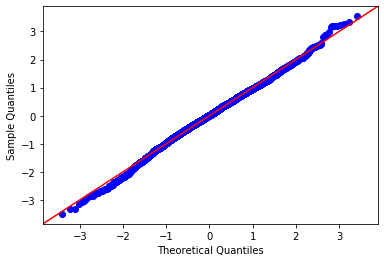

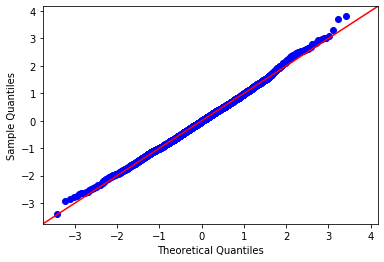

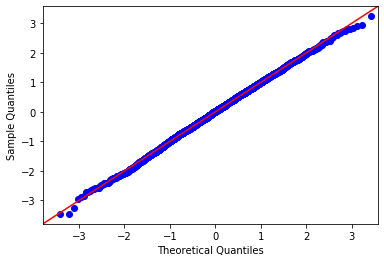

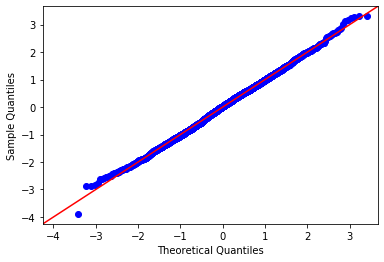

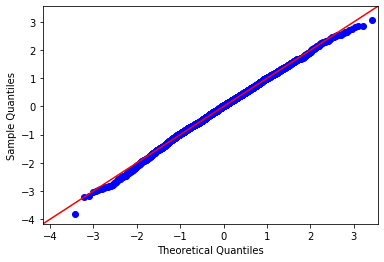

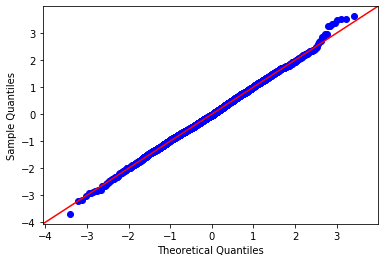

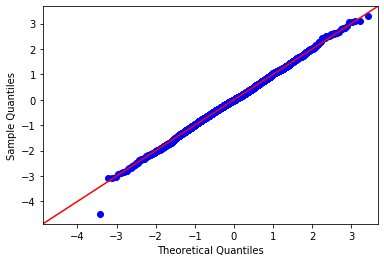

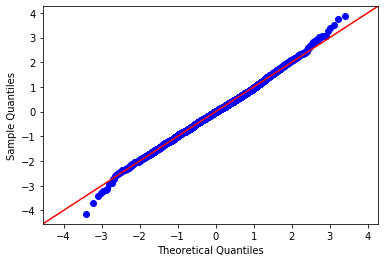

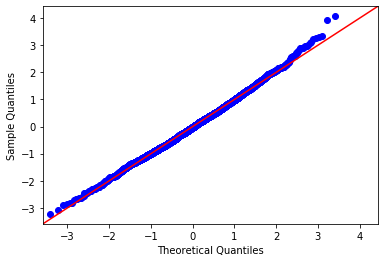

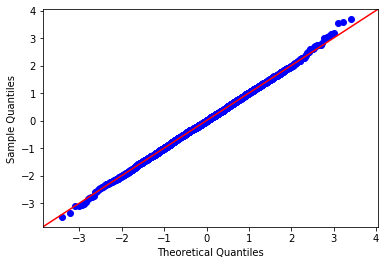

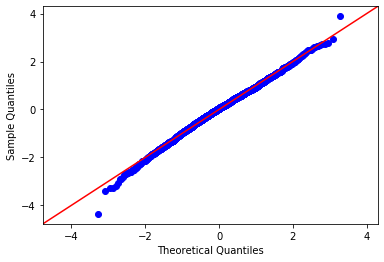

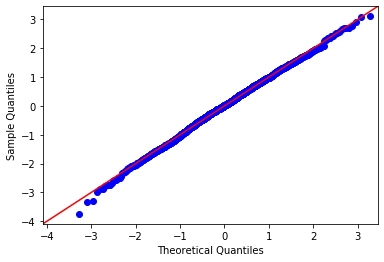

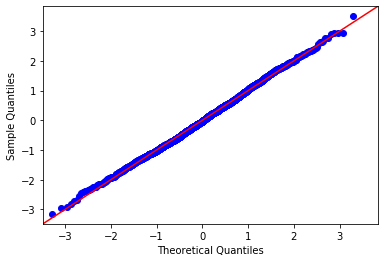

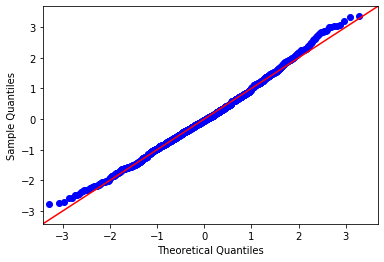

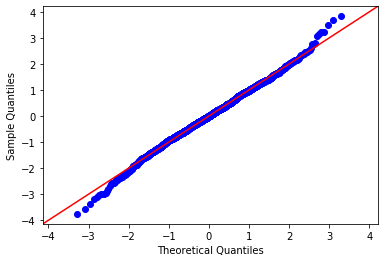

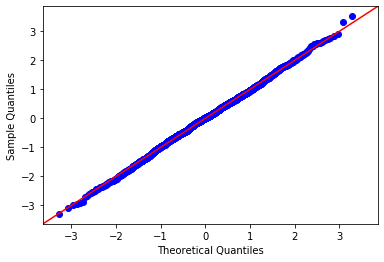

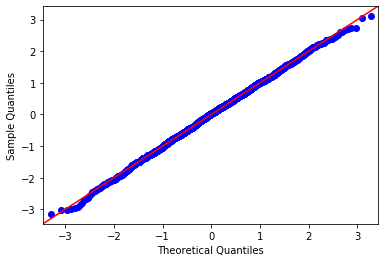

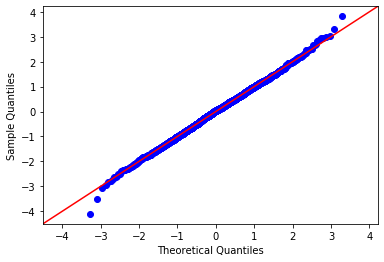

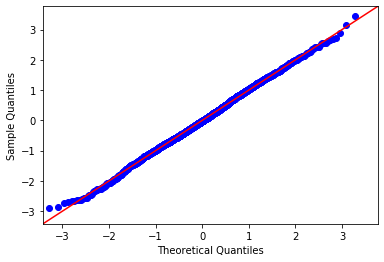

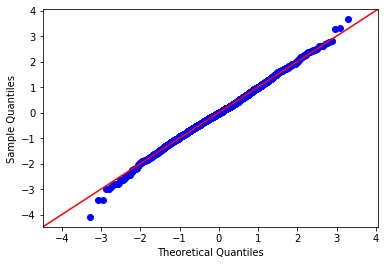

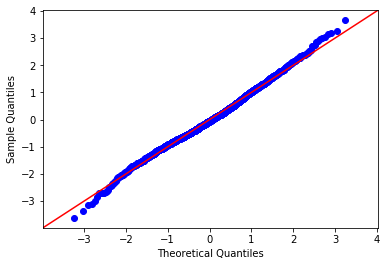

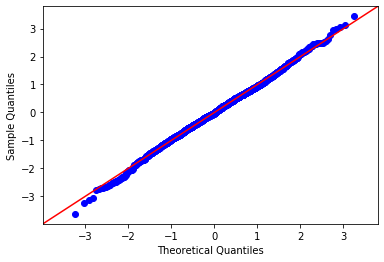

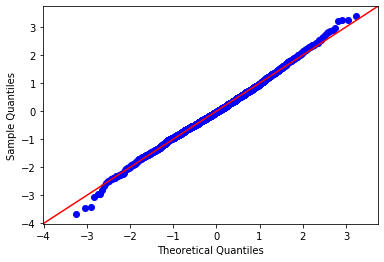

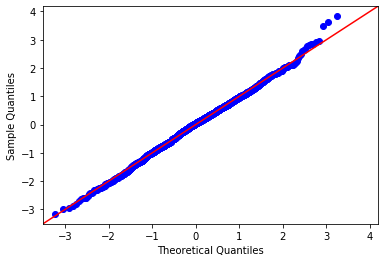

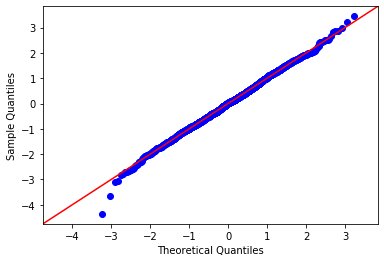

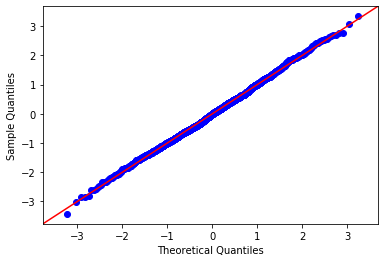

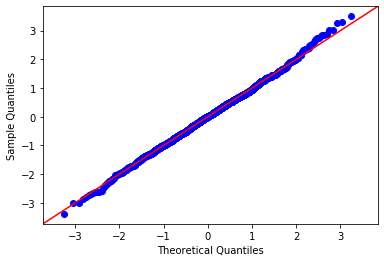

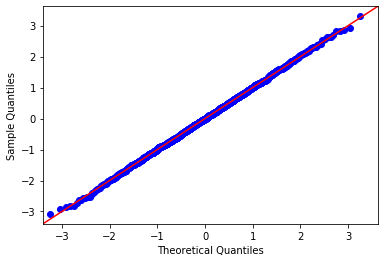

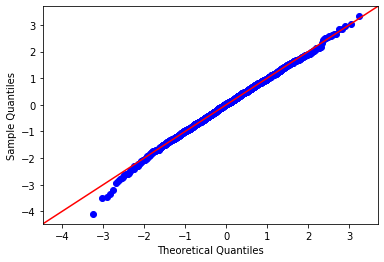

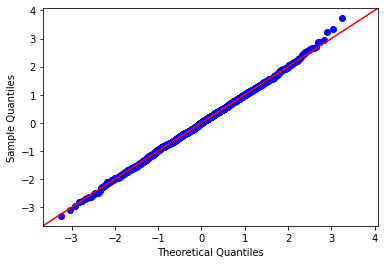

In [126]:
for c in vad: 
    word_matrix = np.load(LOGS + 'semantics_val/' + lexicon_name + '/' + c + '_words.npy')
    scaler = StandardScaler()
    word_matrix = scaler.fit_transform(word_matrix)
    idx = random.sample(range(word_matrix.shape[1]), 10)
    for i in idx: 
        sm.qqplot(word_matrix[:, i], line='45')
        pylab.show()

## NRC VAD

Pre-trained GloVe embeddings

### LDA VAD

In [183]:
def load_lexicon_matrix(c, lexicon_dict, lexicon_name):
    scores = lexicon_dict[c]
    t_matrix = np.load(LOGS + 'semantics_val/' + lexicon_name + '/' + c + '.npy')
    word_order = []
    colors = []
    with open(LOGS + 'semantics_val/' + lexicon_name + '/' + c + '_vocab.txt', 'r') as infile: 
        for line in infile: 
            word = line.strip()
            word_order.append(word)
            if word in scores['high']: 
                colors.append('high')
            elif word in scores['low']: 
                colors.append('low')
    return t_matrix, word_order, colors

def load_inputs(file_path, lexicon_name): 
    with open(file_path, 'r') as infile:
        lexicon_dict = json.load(infile)
    adj_matrix = np.load(LOGS + 'semantics_val/wordnet_axes.npy')
    score_matrices = {}
    word_matrices = {} 
    word_orders = {}
    for c in lexicon_dict: 
        score_matrices[c] = np.load(LOGS + 'semantics_val/' + lexicon_name + '/' + c + '_scores.npy')
        word_matrices[c] = np.load(LOGS + 'semantics_val/' + lexicon_name + '/' + c + '_words.npy')
        word_order = []
        with open(LOGS + 'semantics_val/' + lexicon_name + '/' + c + '_vocab.txt', 'r') as infile: 
            for line in infile: 
                word = line.strip()
                word_order.append(word)
        word_orders[c] = word_order
    return adj_matrix, score_matrices, word_matrices, word_orders

def get_axes(): 
    axes = []
    with open(LOGS + 'semantics_val/axes_order.txt', 'r') as infile: 
        for line in infile: 
            axes.append(line.strip())
    return axes

In [154]:
with open(DATA + 'semantics/cleaned/nrc_vad.json', 'r') as infile:
    vad = json.load(infile)
# same order as validate_semantics.py
axes = get_axes()
for c in vad: 
    print(c)
    print('TOP WORDS')
    t_matrix, word_order, colors = load_lexicon_matrix(c, vad, 'vad')
    t_matrix = t_matrix.T
    max_ind = np.argpartition(t_matrix, -5)[0][-5:]
    for ind in max_ind: 
        print(word_order[int(ind)], colors[int(ind)])
    min_id = np.argpartition(t_matrix, 5)[0][:5]
    for ind in min_id:
        print(word_order[int(ind)], colors[int(ind)])
            
    print('TOP ADJECTIVES')
    t_axes_matrix = np.load(LOGS + 'semantics_val/vad/' + c + '_axes.npy')
    max_ind = np.argpartition(t_axes_matrix.T, -5)[0][-5:]
    for ind in max_ind: 
        print(axes[int(ind)], t_axes_matrix[int(ind)], 'high')
    min_id = np.argpartition(t_axes_matrix.T, 5)[0][:5]
    for ind in min_id:
        print(axes[int(ind)], t_axes_matrix[int(ind)], 'low')

    vals = []
    dims = []
    for i, adj in enumerate(axes): 
        if (i - 1) % 2 == 0:
            if t_axes_matrix[i][0] * t_axes_matrix[i-1][0] > 0: continue # both on same side
            val = abs(t_axes_matrix[i][0] - t_axes_matrix[i-1][0])
            vals.append(val)
            dims.append((axes[i], t_axes_matrix[i][0], axes[i-1], t_axes_matrix[i-1][0]))
    sorted_dims = [x for _,x in sorted(zip(vals,dims))]
    print('1st max:', sorted_dims[-1])
    print('2nd max:', sorted_dims[-2])
    print('3rd max:', sorted_dims[-3])
    print()

valence
TOP WORDS
partnership high
gifts high
friendship high
award high
excellence high
incompetence low
psychotic low
stench low
bastards low
inefficiency low
TOP ADJECTIVES
cursed.a.01_antonym [2.93056569] high
sound.a.01_synonym [3.00034989] high
seamed.a.01_antonym [3.24506513] high
nice.a.01_synonym [3.40294148] high
heedless.a.01_antonym [3.28507527] high
inevitable.a.01_antonym [-3.0188676] low
pardonable.a.01_antonym [-3.14290308] low
competent.a.01_antonym [-2.80301221] low
offensive.a.03_synonym [-2.77082157] low
penitent.a.01_antonym [-2.75641759] low
1st max: ('nice.a.01_antonym', -1.929723272398773, 'nice.a.01_synonym', 3.402941482520492)
2nd max: ('happy.a.01_antonym', -1.747616152777555, 'happy.a.01_synonym', 2.851068753439934)
3rd max: ('cared-for.a.01_antonym', -1.5284495115774526, 'cared-for.a.01_synonym', 2.910668876005208)

arousal
TOP WORDS
adrenaline high
fury high
maniac high
thrill high
orgy high
beige low
blue low
pew low
parchment low
crepe low
TOP ADJECTIVES

Correlation between LDA scores and VAD scores

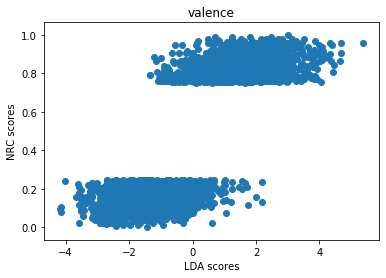

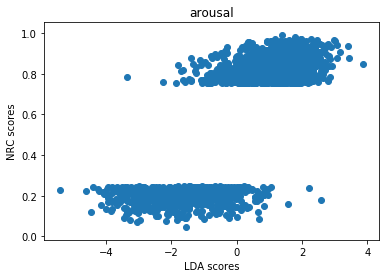

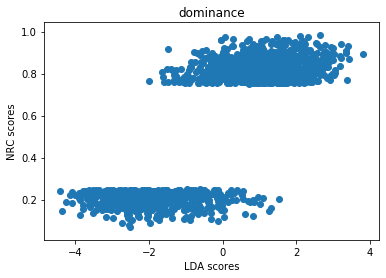

In [146]:
data_file = DATA + 'semantics/NRC-VAD-Lexicon-Aug2018Release/NRC-VAD-Lexicon.txt'
nrc_scores = defaultdict(dict)
with open(data_file, 'r') as infile: 
    for line in infile: 
        contents = line.strip().split('\t')
        word = contents[0]
        val = float(contents[1])
        aro = float(contents[2])
        dom = float(contents[3])
        nrc_scores['valence'][word] = val
        nrc_scores['arousal'][word] = aro
        nrc_scores['dominance'][word] = dom
for c in vad: 
    t_matrix, word_order, colors = load_vad_matrix(c, vad)
    x = []
    y = []
    for idx, w in enumerate(word_order): 
        x.append(t_matrix[int(idx)][0])
        y.append(nrc_scores[c][w])
    plt.scatter(x, y)
    plt.xlabel('LDA scores')
    plt.ylabel('NRC scores')
    plt.title(c)
    plt.show()

### FrameAxis VAD

In [147]:
with open(LOGS + 'semantics_val/vad/frameaxis.json', 'r') as infile:
    biases = json.load(infile) # {c : { pole : (bias, effect) } }
    
for c in biases: 
    print(c)
    vals = []
    dims = []
    for i in biases[c]: 
        dims.append((axes[int(i)], axes[int(i)-1], biases[c][i][0]))
        vals.append(biases[c][i][0])
    sorted_dims = [x for _,x in sorted(zip(vals,dims))]
    print('1st max:', sorted_dims[-1])
    print('2nd max:', sorted_dims[-2])
    print('3rd max:', sorted_dims[-3])
    print()

valence
1st max: ('nice.a.01_antonym', 'nice.a.01_synonym', 0.1712394591439324)
2nd max: ('healthy.a.01_antonym', 'healthy.a.01_synonym', 0.17019110721604408)
3rd max: ('faithful.a.01_antonym', 'faithful.a.01_synonym', 0.15717166239716235)

arousal
1st max: ('moderate.a.01_antonym', 'moderate.a.01_synonym', 0.11165093668238923)
2nd max: ('wholesome.a.01_antonym', 'wholesome.a.01_synonym', 0.1031880982818658)
3rd max: ('happy.a.01_antonym', 'happy.a.01_synonym', 0.0992123746620069)

dominance
1st max: ('important.a.01_antonym', 'important.a.01_synonym', 0.18249409616347761)
2nd max: ('superior.a.01_antonym', 'superior.a.01_synonym', 0.17615962826717357)
3rd max: ('steady.a.01_antonym', 'steady.a.01_synonym', 0.17036502902701037)



## Occupations

In [167]:
with open(DATA + 'semantics/cleaned/occupations.json', 'r') as infile:
    lexicon_dict = json.load(infile)
# same order as validate_semantics.py
axes = get_axes()
lexicon_name = 'occupations'
for c in lexicon_dict: 
    print(c)
    print('TOP WORDS')
    t_matrix, word_order, colors = load_lexicon_matrix(c, lexicon_dict, lexicon_name)
    t_matrix = t_matrix.T
    max_ind = np.argpartition(t_matrix, -5)[0][-5:]
    for ind in max_ind: 
        print(word_order[int(ind)], colors[int(ind)])
    min_id = np.argpartition(t_matrix, 5)[0][:5]
    for ind in min_id:
        print(word_order[int(ind)], colors[int(ind)])
            
    print('TOP ADJECTIVES')
    t_axes_matrix = np.load(LOGS + 'semantics_val/' + lexicon_name + '/' + c + '_axes.npy')
    max_ind = np.argpartition(t_axes_matrix.T, -5)[0][-5:]
    for ind in max_ind: 
        print(axes[int(ind)], t_axes_matrix[int(ind)], 'high')
    min_id = np.argpartition(t_axes_matrix.T, 5)[0][:5]
    for ind in min_id:
        print(axes[int(ind)], t_axes_matrix[int(ind)], 'low')

    vals = []
    dims = []
    for i, adj in enumerate(axes): 
        if adj == 'creative.a.01_antonym' or adj == 'scholarly.a.01_antonym': 
            print("------", adj, axes[i], t_axes_matrix[i][0], axes[i-1], t_axes_matrix[i-1][0])
        if (i - 1) % 2 == 0:
            if t_axes_matrix[i][0] * t_axes_matrix[i-1][0] > 0: continue # both on same side
            val = abs(t_axes_matrix[i][0] - t_axes_matrix[i-1][0])
            vals.append(val)
            dims.append((axes[i], t_axes_matrix[i][0], axes[i-1], t_axes_matrix[i-1][0]))
    sorted_dims = [x for _,x in sorted(zip(vals,dims))]
    print('1st max:', sorted_dims[-1])
    print('2nd max:', sorted_dims[-2])
    print('3rd max:', sorted_dims[-3])
    print()

gender
TOP WORDS
civil engineers high
mechanical engineers high
taxi drivers high
roofers high
construction laborers high
occupational therapists low
nursing assistants low
dental assistants low
medical assistants low
nurse practitioners low
TOP ADJECTIVES
leaded.a.02_antonym [2.16746111] high
cyclic.a.03_antonym [2.6086671] high
integrative.a.01_antonym [2.76825556] high
centrifugal.a.01_antonym [2.38527212] high
anabolic.a.02_antonym [2.30908055] high
inevitable.a.01_antonym [-2.14837032] low
eradicable.a.01_antonym [-2.16806383] low
equatorial.a.03_antonym [-1.86977734] low
prenatal.a.01_antonym [-1.84940379] low
antemeridian.a.01_antonym [-1.74049665] low
------ creative.a.01_antonym creative.a.01_antonym 0.40590457384895823 creative.a.01_synonym 0.009811853454095298
------ scholarly.a.01_antonym scholarly.a.01_antonym 0.2542563220203349 scholarly.a.01_synonym 0.2641798023158006
1st max: ('derived.a.01_antonym', -0.47912075923040237, 'derived.a.01_synonym', 1.9489274994211294)
2nd 

In [173]:
with open(LOGS + 'semantics_val/occupations/frameaxis.json', 'r') as infile:
    biases = json.load(infile) # {c : { pole : (bias, effect) } }
    
for c in biases: 
    print(c)
    vals = []
    dims = []
    for i in biases[c]: 
        dims.append((axes[int(i)], axes[int(i)-1], biases[c][i][0], biases[c][i][2], biases[c][i][3]))
        vals.append(biases[c][i][0])
    sorted_dims = [x for _,x in sorted(zip(vals,dims))]
    print('1st max:', sorted_dims[-1])
    print('2nd max:', sorted_dims[-2])
    print('3rd max:', sorted_dims[-3])
    print()

gender
1st max: ('dominant.a.01_antonym', 'dominant.a.01_synonym', 0.12892956647112358, 0.1975262403137613, 0.0685966738426377)
2nd max: ('paternal.a.02_antonym', 'paternal.a.02_synonym', 0.11145370606601612, 0.0785046020879515, -0.032949103978064616)
3rd max: ('arbitrary.a.01_antonym', 'arbitrary.a.01_synonym', 0.09768624363065256, 0.14544125054387924, 0.04775500691322667)

stem
1st max: ('biological.a.02_antonym', 'biological.a.02_synonym', 0.11161605673559367, 0.019057633410175176, -0.0925584233254185)
2nd max: ('functional.a.01_antonym', 'functional.a.01_synonym', 0.10568012005243375, -0.03638561787763324, -0.142065737930067)
3rd max: ('basic.a.01_antonym', 'basic.a.01_synonym', 0.09148565261600906, -0.03207285982236588, -0.12355851243837494)

art
1st max: ('theoretical.a.02_antonym', 'theoretical.a.02_synonym', 0.1401593479471962, 0.11910189894055992, -0.02105744900663627)
2nd max: ('pleasing.a.01_antonym', 'pleasing.a.01_synonym', 0.13470444665696998, -0.015533291555532566, -0.15

### Playground

See if all axes are similar in quality with a few test examples. 

In [185]:
adj_matrix, score_matrices, word_matrices, word_order = load_inputs(DATA + 'semantics/cleaned/occupations.json', 
                                                                    'occupations')
axes = get_axes()

In [194]:
microframe = None
for i, adj in enumerate(axes): 
    if adj == 'creative.a.01_antonym': 
        pole1 = adj_matrix[i]
        pole2 = adj_matrix[i-1]
        microframe = pole1 - pole2
bias_scores = []
for i, w in enumerate(word_order['stem']): 
    print(w, 1 - spatial.distance.cosine(word_matrices['stem'][i], microframe))

computational scientist -0.24271334408120926
other psychologists -0.09996996370610267
microbiologist 0.05967227154214827
forensic scientist -0.10694879138976088
aerospace engineers -0.01640981445591705
geologist -0.016667264304458307
petrochemical engineer -0.022925908776065596
botanist -0.005749717360060913
aeronautical engineer -0.04160949273231007
mechanical engineer -0.06855170908319219
nuclear engineers -0.06060636864456481
urban planner -0.06935927957855315
sociologists 0.001449531856087427
educational technologist -0.09811559072334464
chemical technicians 0.045787172758938066
naturalist -0.12451740521908183
statisticians 0.042547369668678114
veterinarian 0.011242459323099974
pathologist 0.1016808547148782
chemist -0.05951590583654487
mathematician -0.15263310138146324
biochemist 0.03606968805377464
physicist -0.1337110298261608
paleontologist -0.07914332437929872
landscape architects -0.14022220026569343
mathematicians -0.0850395682840197
petroleum geologist -0.05781577515430225